In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core import display as ICD

In [0]:
pd.options.display.max_rows = 25

In [0]:
emails = pd.read_csv("emails.csv")
a_scores = pd.read_csv("a_scores.csv")
g_memb = pd.read_csv("g_memb.csv")
groups = pd.read_csv("groups.csv")
professionals = pd.read_csv("professionals.csv")
q_scores = pd.read_csv("q_scores.csv")
questions = pd.read_csv("questions.csv")
sch_memb = pd.read_csv("sch_memb.csv")
t_questions = pd.read_csv("t_questions.csv")
students = pd.read_csv("students.csv")
t_users = pd.read_csv("t_users.csv")
tags = pd.read_csv("tags.csv")
matches = pd.read_csv("matches.csv")
answers = pd.read_csv("answers.csv")
comments = pd.read_csv("comments.csv")

In [0]:
a_scores.head()

,id,score
0,7b2bb0fc0d384e298cffa6afde9cf6ab,1
1,7640a6e5d5224c8681cc58de860858f4,5
2,3ce32e236fa9435183b2180fb213375c,2
3,fa30fe4c016043e382c441a7ef743bfb,0
4,71229eb293314c8a9e545057ecc32c93,2


План:

1) Рассмотрим все данные, найдем пропуски.

2) questions
    
3) answers

4) Сравним рост $\textbf{questions и answers:}$
    
5) q_scores
    
6) a_scores
    
7) tags
    
8) t_users

9) t_questions

10) students

11) professionals

12) Сравним $\textbf{professionals и students:}$
    
13) comments

14) emails

15) matches

16) groups

17) g_memb

18) sch_memb

19) Визуализация соотношения студентов/профессионалов и вопросов/ответов

$\textbf{Вспомогательные функции :}$

In [0]:
#Основная статистика по датафрейму
def main_stats(df):
    df_head = df.head()
    df_shape = df.shape
    df_nunique = df.nunique()
    ICD.display(df_head)
    print('\033[1m' + 'число наблюдений =', df_shape[0])
    print('\n' + '\033[1m' + 'число уникальных значений признаков')
    ICD.display(df_nunique)

In [0]:
#Годовой прирост по дате
def yearly_growth(df, date_added):
    df['year'] = df[date_added].dt.year
    id_col_name = [col for col in df.columns if 's_id' in col]
    yearly_growth_r = df.groupby('year')[id_col_name].count().reset_index()
    yearly_growth_r.set_index('year', inplace=True)
    return yearly_growth_r

In [0]:
#Месячный прирост по дате
def monthly_growth(df, date_added):
    df['year'] = df[date_added].dt.year
    df['month'] = df[date_added].dt.month
    id_col_name = [col for col in df.columns if 's_id' in col]
    monthly_growth_r = df.groupby(['year', 'month'])[id_col_name].count().reset_index()
    monthly_growth_r.sort_values(by=['year', 'month'], inplace=True)
    return monthly_growth_r

In [0]:
#Месячный рост количества по дате
def monthly_count(df, date_added):
    df['year'] = df[date_added].dt.year
    df['month'] = df[date_added].dt.month
    id_col_name = [col for col in df.columns if 's_id' in col]
    monthly_count_r = df.groupby(['year', 'month'])[id_col_name].count().reset_index()
    monthly_count_r.sort_values(by=['year', 'month'], inplace=True)
    monthly_count_r[id_col_name] = monthly_count_r[id_col_name].cumsum()
    return monthly_count_r

In [0]:
#Круговая диаграмма
def plot_pie(df1, df2, pie_title, pie_label_1, pie_label_2):
    id_df1_name = [col for col in df1.columns if 'id' in col][0]
    id_df2_name = [col for col in df2.columns if 'author_id' in col][0]
    df_merge = pd.merge(df1, df2, how='left', left_on = id_df1_name, right_on = id_df2_name)
    df = pd.DataFrame({'': [df_merge.isna().sum()[id_df2_name],
                                    df1.shape[0] - df_merge.isna().sum()[id_df2_name]]},
                   index=['1', '2'])
    ax = df.plot.pie(y='', figsize=(9, 9),labels=[
            pie_label_1,
            pie_label_2],
            autopct='%1.1f%%')
    ax.set_title(pie_title)
    plt.show()

In [0]:
#Лист датафреймов с признаком date
list_of_df_with_data = [emails, professionals, questions, students, answers, comments]

In [0]:
emails.head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40 UTC+0000,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15 UTC+0000,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27 UTC+0000,email_notification_daily
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19 UTC+0000,email_notification_daily
4,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40 UTC+0000,email_notification_daily


In [0]:
%time
#Может занять пару минут
#Поменяем тип значения date для работы с датой
for df in list_of_df_with_data:
    date_cols = [col for col in df.columns if 'date' in col]
    print ("Processing columns : ", date_cols)
    df[date_cols] = df[date_cols].astype('datetime64')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
Processing columns :  ['emails_date_sent']
Processing columns :  ['professionals_date_joined']
Processing columns :  ['questions_date_added']
Processing columns :  ['students_date_joined']
Processing columns :  ['answers_date_added']
Processing columns :  ['comments_date_added']


1) $\textbf{Рассмотрим все данные вместе, найдем пропуски:}$

In [0]:
List_of_dfs = [emails, a_scores, g_memb, groups, professionals,
              q_scores, questions, sch_memb, t_questions, students,
              t_users, tags, matches, answers, comments
              ]
List_of_dfs_names = ['emails', 'a_scores', 'g_memb', 'groups', 'professionals',
              'q_scores', 'questions', 'sch_memb', 't_questions', 'students',
              't_users', 'tags', 'matches', 'answers', 'comments'
              ]

In [0]:
c = 0
for i in List_of_dfs:
    print('Количество пропусков в {} = {:2.0f}; '.format(List_of_dfs_names[c], i.isnull().sum().sum()),
          'Процент пропусков в {} = {:2.0f}'.format(List_of_dfs_names[c], len(i[i.isna().any(axis=1)])/len(i)*100))
    c += 1

Количество пропусков в emails =  0;  Процент пропусков в emails =  0
Количество пропусков в a_scores =  0;  Процент пропусков в a_scores =  0
Количество пропусков в g_memb =  0;  Процент пропусков в g_memb =  0
Количество пропусков в groups =  0;  Процент пропусков в groups =  0
Количество пропусков в professionals = 7741;  Процент пропусков в professionals = 19
Количество пропусков в q_scores =  0;  Процент пропусков в q_scores =  0
Количество пропусков в questions =  0;  Процент пропусков в questions =  0
Количество пропусков в sch_memb =  0;  Процент пропусков в sch_memb =  0
Количество пропусков в t_questions =  0;  Процент пропусков в t_questions =  0
Количество пропусков в students = 2033;  Процент пропусков в students =  7
Количество пропусков в t_users =  0;  Процент пропусков в t_users =  0
Количество пропусков в tags =  1;  Процент пропусков в tags =  0
Количество пропусков в matches =  0;  Процент пропусков в matches =  0
Количество пропусков в answers =  1;  Процент пропуск

В данных присутсвуют nan значения. Посмотрим на них.

In [0]:
students[students.isna().any(axis=1)].head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00


In [0]:
professionals[professionals.isna().any(axis=1)].head(15)

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44
5,c9bfa93898594cbbace436deca644c64,NaN,NaN,NaN,2011-12-12 14:25:46
6,ed85488fb5e941eaa97014137fcbf317,NaN,NaN,NaN,2011-12-28 03:02:04
7,102fb92c28034ad988b593d0111cb4bb,NaN,NaN,NaN,2011-12-26 05:00:00
8,5a4a16842ec64430ac3f916aacf35fe1,NaN,NaN,NaN,2011-12-26 05:00:00
9,81999d5ad93549dab55636a545e84f2a,NaN,NaN,NaN,2011-12-26 05:00:00


Пропущенные значения, которые соствляют менее 1% от всего датафрейма, можно удалить.

In [0]:
tags.dropna(inplace = True)
answers.dropna(inplace = True)
comments.dropna(inplace = True)

2) Рассмотрим $\textbf{questions:}$

In [0]:
main_stats(questions)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


число наблюдений = 23931

число уникальных значений признаков


questions_id            23931
questions_author_id     12329
questions_date_added    23869
questions_title         23739
questions_body          23681
dtype: int64

In [0]:
questions.sort_values(by=['questions_date_added'])

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
6784,38436aadef3d4b608ad089cf53ab0fe7,05444a2f42454327b2ac4b463c0adbe0,2011-09-27 15:23:17,What should I major in if I want to become an ...,<p>Many students want to become investment ban...
7937,edb8c179c5d64c9cb812a59a32045f55,05444a2f42454327b2ac4b463c0adbe0,2011-09-27 15:23:54,What is the typical compensation range for a f...,Please tell us what the common compensation ra...
21892,333464d7484b43e3866e86096bc4ddb9,05444a2f42454327b2ac4b463c0adbe0,2011-09-27 15:24:27,What are the best ways to prepare for intervie...,"McKinsey, Bain, BCG, mainly.\r\n\r\nLooking fo..."
5278,4b995e60b99d4ee18346e893e007cb8f,05444a2f42454327b2ac4b463c0adbe0,2011-09-27 15:24:52,What are the top tier management consulting fi...,Which companies are the top-tier? #consulting
19021,f6b9ca94aed04ba28256492708e74f60,05444a2f42454327b2ac4b463c0adbe0,2011-09-27 15:26:19,What do top tier consulting firms look for in ...,Please explain the factors consulting firms lo...
15522,216abb4056a64b198bdc6544830c822a,05444a2f42454327b2ac4b463c0adbe0,2011-09-27 15:26:48,"What does an Investment Bank do other than ""in...","Investment banks do a lot more than just ""inve..."
6509,ca209b4e19064d8e9834b3ca1a3f5361,05444a2f42454327b2ac4b463c0adbe0,2011-09-27 15:27:14,What is the path to get from high school to be...,What are some of the paths to getting from beg...
3001,dd363c09e4744c4b977499f215289b35,05444a2f42454327b2ac4b463c0adbe0,2011-10-10 19:37:26,What is the entry-level salary at a consulting...,I'm interested in getting benchmarks on salari...
19581,098e4b0acf17440da9cbd7c036c53d3b,977428d851b24183b223be0eb8619a8c,2011-11-09 20:42:03,Which careers make the most money?,I want to know what job I should pursue to mak...
23928,63c89317413046f483020585f0cc8dc4,977428d851b24183b223be0eb8619a8c,2011-11-09 20:42:47,Which careers are good if I enjoy working with...,"I have been volunteering, and I have found tha..."


У нас имеется 23931 вопрос с 2011 по 2019 годы.

In [0]:
questions.nunique()

questions_id            23931
questions_author_id     12329
questions_date_added    23869
questions_title         23739
questions_body          23681
dtype: int64

23931 уникальных вопроса заданных 12329 уникальными авторами. 1.94 вопроса в среднем задает один человек.

In [0]:
print('Средняя длина вопроса = {:2.2f}'.format(questions['questions_body'].
                                                str.lstrip('<p> \n\t').str.len().mean()))
print('Медиана длины вопроса = {:2.2f}'.format(questions['questions_body'].
                                                str.lstrip('<p> \n\t').str.len().median()))
print('Среднеквадратическое отклонение длины вопроса = {:2.2f}'.format(questions['questions_body'].
                                                str.lstrip('<p> \n\t').str.len().std()))

Средняя длина вопроса = 223.30
Медиана длины вопроса = 174.00
Среднеквадратическое отклонение длины вопроса = 203.75


В связи с высоким среднеквадратичным отклонением разумнее использовать среднее значение, далее длины ответов и комментариев будет сравнивать по средним значениям.

Средняя длина вопроса 223 символа. Плюс-минус пара символов не относящихся к тексту.

Сгруппируем вопросы по месяцам:

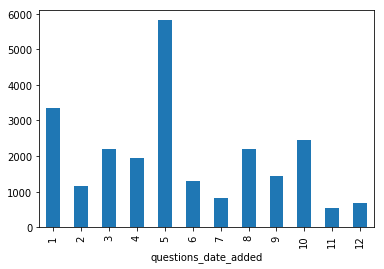

In [0]:
questions.groupby(questions.questions_date_added.dt.month).questions_id.count().plot.bar()
plt.show()

В мае задается как минимум в 2 раза больше вопросов, чем в любом другом месяце.

Сгруппируем вопросы по дням:

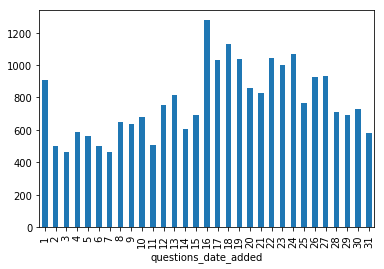

In [0]:
questions.groupby(questions.questions_date_added.dt.day).questions_id.count().plot.bar()
plt.show()

Во второй половине месяца задают больше вопросов, чем в первой.

Сгруппируем вопросы по дням недели, где 0 - это понедельник:

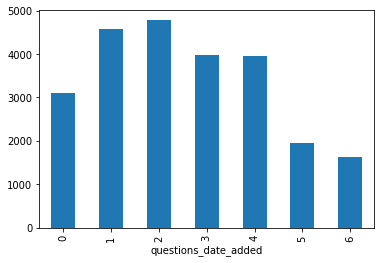

In [0]:
questions.groupby(questions.questions_date_added.dt.dayofweek).questions_id.count().plot.bar()
plt.show()

В выходные дни задают меньше всего вопросов.

3) Рассмотрим $\textbf{answers:}$

In [0]:
main_stats(answers)

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33,I agree with Denise. Every single job I've had...


число наблюдений = 51122

число уникальных значений признаков


answers_id             51122
answers_author_id      10169
answers_question_id    23110
answers_date_added     51061
answers_body           50401
dtype: int64

С ответами у нас другая ситуация, нежели с вопросами. В среднем один человек отвечает на 5 вопросов. А на один вопрос приходится 2.2 ответа.

In [0]:
answers['answers_body'].str.lstrip('<p> \n\t').str.len().mean()

890.5476702789406

Средняя длина ответа 890 символов. Что в несколько раз превышает длину текста вопроса.

Сгруппируем ответы по месяцам:

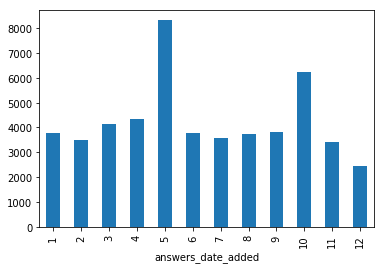

In [0]:
answers.groupby(answers.answers_date_added.dt.month).answers_id.count().plot.bar()
plt.show()

Как и с вопросами, в мае больше всего ответов.

Сгруппируем ответы по дням:

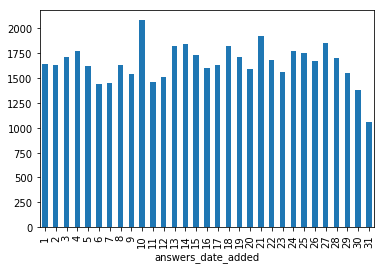

In [0]:
answers.groupby(answers.answers_date_added.dt.day).answers_id.count().plot.bar()
plt.show()

А вот ответы распределены равномерно в течение всего месяца.

Сгруппируем ответы по дням недели, где 0 - это понедельник:

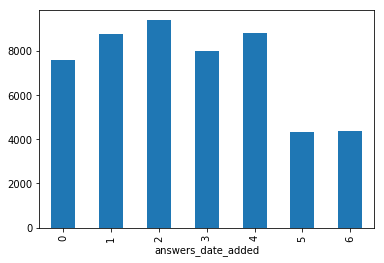

In [0]:
answers.groupby(answers.answers_date_added.dt.dayofweek).answers_id.count().plot.bar()
plt.show()

Также как и с вопросами, отвечают по выходным дням реже.

4) Сравним прирост $\textbf{questions и answers:}$

In [0]:
questions_yearly_cumcount = yearly_growth(questions,'questions_date_added')
answers_yearly_cumcount = yearly_growth(answers, 'answers_date_added')

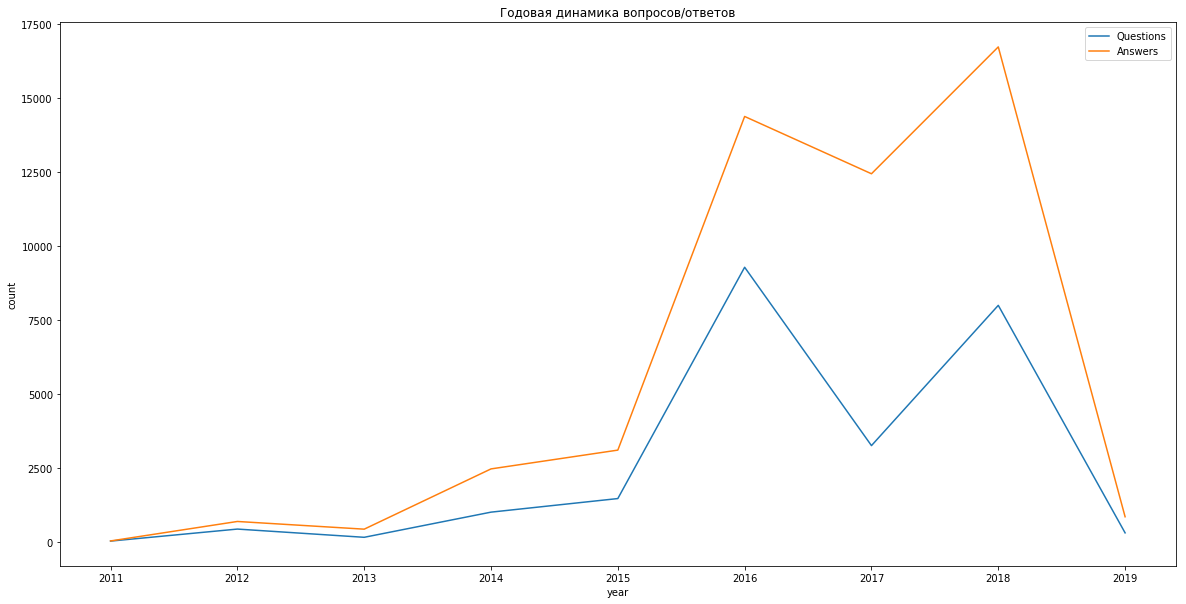

In [0]:
plt.figure(figsize=(20, 10))
plt.plot(questions_yearly_cumcount, label='Questions')
plt.plot(answers_yearly_cumcount, label='Answers')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Годовая динамика вопросов/ответов')
plt.legend()
plt.show()

In [0]:
questions_monthly_count = monthly_growth(questions, 'questions_date_added')
answers_monthly_count = monthly_growth(answers, 'answers_date_added')

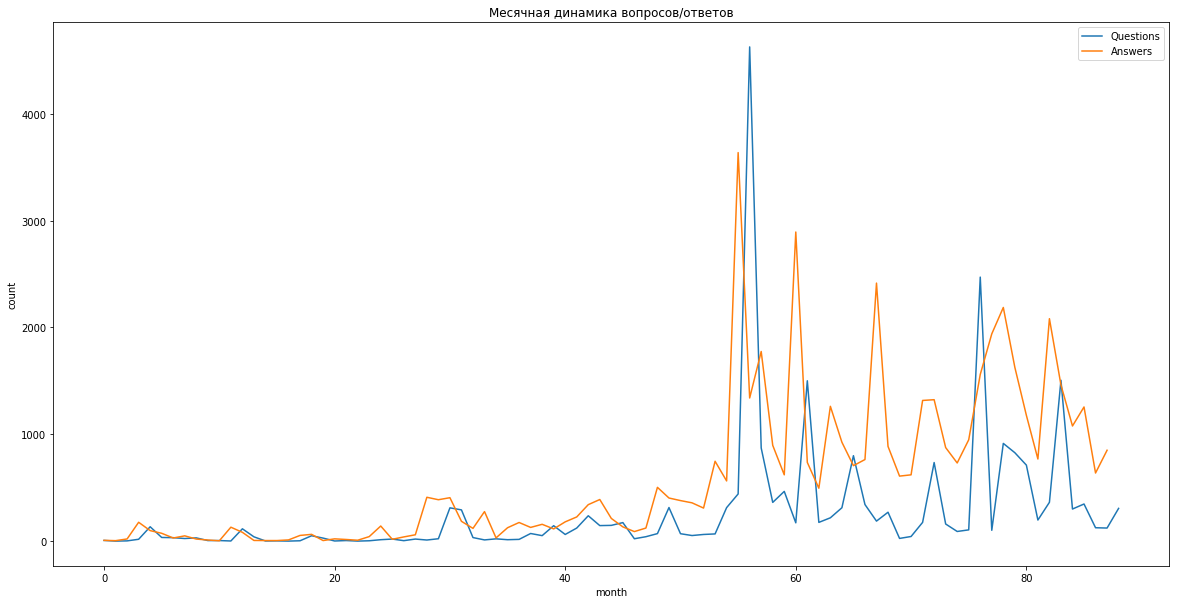

In [0]:
plt.figure(figsize=(20, 10))
plt.plot(questions_monthly_count.questions_id, label='Questions')
plt.plot(answers_monthly_count.answers_id, label='Answers')
plt.xlabel('month')
plt.ylabel('count')
plt.title('Месячная динамика вопросов/ответов')
plt.legend()
plt.show()

In [0]:
questions_monthly_cumcount = monthly_count(questions,'questions_date_added')
answers_monthly_cumcount = monthly_count(answers,'answers_date_added')

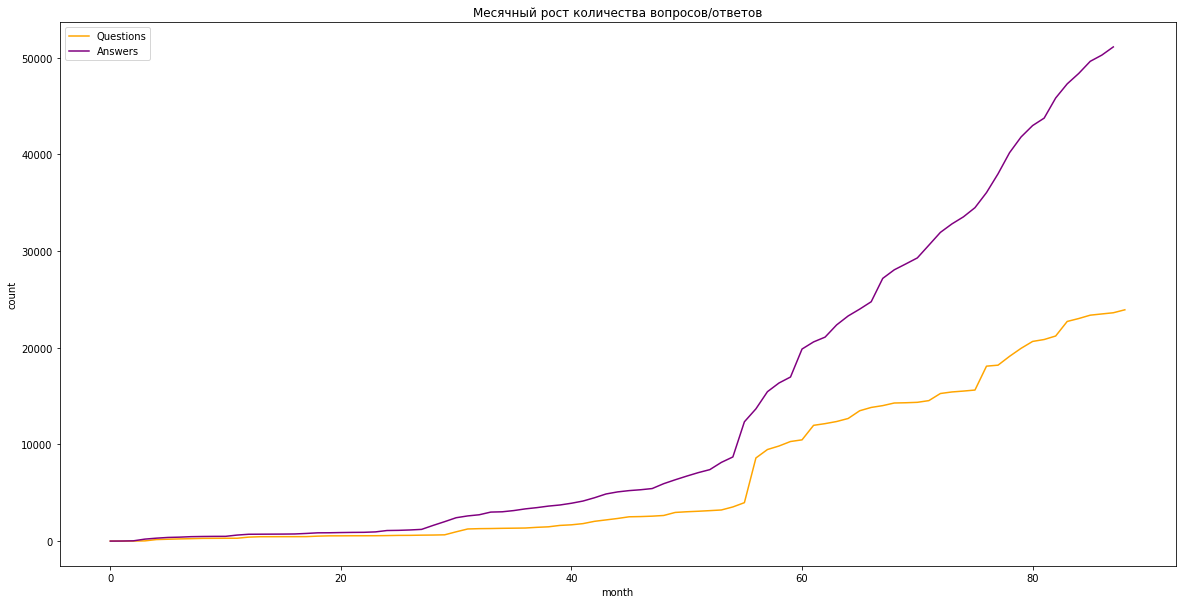

In [0]:
plt.figure(figsize=(20, 10))
plt.plot(questions_monthly_cumcount.questions_id, label='Questions', color='orange')
plt.plot(answers_monthly_cumcount.answers_id, label='Answers', color='purple')
plt.xlabel('month')
plt.ylabel('count')
plt.title('Месячный рост количества вопросов/ответов')
plt.legend()
plt.show()

В последние месяцы наблюдается увеличения отношения количества ответов кколичеству вопросов. Другими словами, в последние месяцы на одни вопрос приходится все больше ответов.

5) Рассмотрим $\textbf{q_scores:}$

In [0]:
main_stats(q_scores)

,id,score
0,38436aadef3d4b608ad089cf53ab0fe7,5
1,edb8c179c5d64c9cb812a59a32045f55,4
2,333464d7484b43e3866e86096bc4ddb9,6
3,4b995e60b99d4ee18346e893e007cb8f,6
4,f6b9ca94aed04ba28256492708e74f60,6


число наблюдений = 23928

число уникальных значений признаков


id       23928
score       75
dtype: int64

In [0]:
q_scores['score'].value_counts()

1      7311
2      6120
3      3893
4      2583
5      1370
0       732
6       676
7       376
8       197
9       140
10      107
11       59
       ... 
74        1
68        1
84        1
100       1
121       1
73        1
41        1
37        1
120       1
104       1
38        1
39        1
Name: score, Length: 75, dtype: int64

In [0]:
q_scores['score'].sum()

69399

69399 оценок набрали вопросы за весь данный период.

In [0]:
q_scores['score'].mean()

2.9003259779338015

Почти 3 оценки в среднем набирает каждый вопрос.

In [0]:
q_scores['score'].max()

125

125 оценок наибольший показатель среди вопросов.

Построим countplot для вопросов, имеюших score меньше 30.

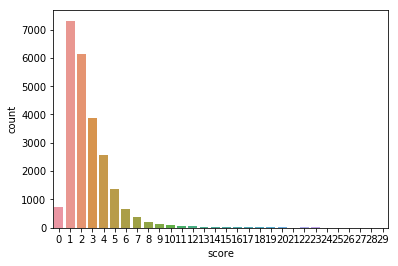

In [0]:
sns.countplot(x="score", data=q_scores.loc[q_scores.score<30])
plt.show()

Самая распространенный score среди вопросов - это 1 и 2 оценки.

6) Рассмотрим $\textbf{a_scores:}$

In [0]:
main_stats(a_scores)

,id,score
0,7b2bb0fc0d384e298cffa6afde9cf6ab,1
1,7640a6e5d5224c8681cc58de860858f4,5
2,3ce32e236fa9435183b2180fb213375c,2
3,fa30fe4c016043e382c441a7ef743bfb,0
4,71229eb293314c8a9e545057ecc32c93,2


число наблюдений = 51138

число уникальных значений признаков


id       51138
score       23
dtype: int64

In [0]:
a_scores['score'].value_counts()

0     37301
1      9615
2      2660
3       854
4       362
5       159
6        67
7        45
8        28
9        13
10        8
12        7
11        5
13        3
14        3
25        1
15        1
17        1
18        1
19        1
20        1
22        1
30        1
Name: score, dtype: int64

In [0]:
a_scores['score'].sum()

21264

21264 количество оценок у ответов. Что значительно меньше 69399 оценок у вопросов.

In [0]:
a_scores['score'].mean()

0.4158160272204623

Соответственно меньше и среднее значение. 0.42 против 2.9 среднего у вопросов.

In [0]:
a_scores['score'].max()

30

30 оценок - макисимальное значение среди ответов.

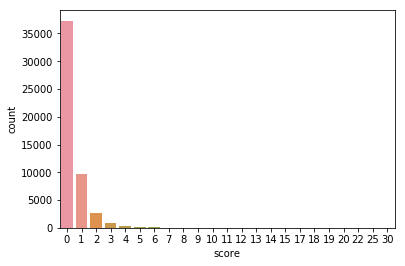

In [0]:
sns.countplot(x="score", data=a_scores)
plt.show()

Самая распространенная оценка ответов - это 0 баллов.

7) Рассмотрим $\textbf{tags:}$

In [0]:
main_stats(tags)

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


число наблюдений = 16268

число уникальных значений признаков


tags_tag_id      16268
tags_tag_name    16268
dtype: int64

8) Рассмотрим $\textbf{t_users:}$

In [0]:
main_stats(t_users)

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


число наблюдений = 136663

число уникальных значений признаков


tag_users_tag_id     11911
tag_users_user_id    30202
dtype: int64

30202 уникальных пользователя следят за 11911 уникальными тэгами.

In [0]:
print('Cреднее количество отслеживаемых тегов у пользователя = {:2.2f}'.format(t_users.shape[0]/30202))

Cреднее количество отслеживаемых тегов у пользователя = 4.52


In [0]:
t_users.groupby(t_users.tag_users_user_id).count().sort_values(by=['tag_users_tag_id'])

,tag_users_tag_id
tag_users_user_id,
816b3ec43f7740a0a674f98616a322bf,1
87552c6bac354b6db9e9ca76b75d23ae,1
875c304b93b6478694dc5a2c30f011b3,1
8763365391d24cd2a57e52dba6611810,1
876ba8e082e2410791492573f81f9ee7,1
879acff6c59a4a4dbd66a0dee748ffe1,1
879bbf41830f4302a56c49b8aaecaffa,1
87a190bacca24f7d96f4303634bdc5fc,1
87a8d24361944f17bd66ea89761d37d2,1


Максимальное количество тэгов, за которыми следит 1 пользователь - 82. Его можно найти в таблице professionals.

In [0]:
t_users.groupby(t_users.tag_users_user_id).count().mean()

tag_users_tag_id    4.524965
dtype: float64

Среди пользователей, которые следят за тэгами, среднее значение отслеживаемых тэгов равно 5. Позже мы сделаем более точную оценку, когда учтем пользователей, которые не следят за тэгами вообще.

In [0]:
t_users.groupby(t_users.tag_users_tag_id).count().sort_values(by=['tag_users_user_id'])

,tag_users_user_id
tag_users_tag_id,
29512,1
32152,1
32153,1
32154,1
32157,1
32158,1
32161,1
32148,1
32165,1


20141 наиболее популярный тэг. Заглянув в таблицу tags узнаем, что это telecommunications. Также к популярным отслеживаемым тэгам относятся: college, computer-software, technology, information-technology-and-services. 
Почти все популярные тэги связаны с информационными технологиями.

9) Рассмотрим $\textbf{t_questions:}$

In [0]:
main_stats(t_questions)

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


число наблюдений = 76553

число уникальных значений признаков


tag_questions_tag_id          7091
tag_questions_question_id    23288
dtype: int64

Из 16268 тэгов в вопросах использованы только 7091.

In [0]:
print('Cреднее количество тэгов у вопроса = {:2.2f}'.format(t_questions.shape[0]/23288))

Cреднее количество тэгов у вопроса = 3.29


In [0]:
t_questions.groupby(t_questions.tag_questions_tag_id).count().sort_values(by=['tag_questions_question_id'])

,tag_questions_question_id
tag_questions_tag_id,
28913,1
32939,1
32937,1
32936,1
32935,1
32934,1
32931,1
32926,1
32924,1


Самый популярный тэг в вопросах - college. Далее следуют: career, medicine, engineering и business.

10) Рассмотрим $\textbf{students:}$

In [0]:
main_stats(students)

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00


число наблюдений = 30971

число уникальных значений признаков


students_id             30971
students_location        5480
students_date_joined    29736
dtype: int64

Количество уникальных студентов совпадает с размером таблицы.

In [0]:
students.groupby(students.students_location).students_id.count().sort_values()

students_location
.                                         1
Highland Charter Township, Michigan       1
Highland Heights, Ohio                    1
Highland Park, Illinois                   1
Highland Park, Michigan                   1
Highland Park, New Jersey                 1
Highland, California                      1
Highland, Maryland                        1
Richmond West, Florida                    1
Richmond Hill, Ontario, Canada            1
Ridgefield Park, New Jersey               1
Highlands, Texas                          1
                                       ... 
San Antonio, Texas                      202
Oakland, California                     261
Chicago, Illinois                       344
Chennai, Tamil Nadu, India              437
Houston, Texas                          476
San Jose, California                    548
San Francisco, California               550
Boston, Massachusetts                   557
Hyderabad, Telangana, India             597
Los Angeles, C

Большая часть студентов из Нью Йорка и других городов Америки. Однако, так же много студентов из Индии.

11) Рассмотрим $\textbf{professionals:}$

In [0]:
main_stats(professionals)

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44


число наблюдений = 28152

число уникальных значений признаков


professionals_id             28152
professionals_location        2582
professionals_industry        2470
professionals_headline       22272
professionals_date_joined    28000
dtype: int64

In [0]:
professionals.groupby(professionals.professionals_location).professionals_id.count().sort_values()

professionals_location
Aberdeen Proving Ground, Maryland                                 1
Middletown, Delaware                                              1
Middle River, Maryland                                            1
Middle Island, New York                                           1
Mettupalayam, Tamil Nadu, India                                   1
Metropolitan Region of Sorocaba, State of São Paulo, Brazil       1
Methuen, Massachusetts                                            1
Metairie, Louisiana                                               1
Meru, Meru County, Kenya                                          1
Merta Area, India                                                 1
Merrimack, New Hampshire                                          1
Merrick, New York                                                 1
                                                               ... 
Bengaluru, Karnataka, India                                     394
San Francisco, California

В отличие от студентов, подавляющее большинство профессионалов из США.

In [0]:
professionals.groupby(professionals.professionals_industry).professionals_id.count().sort_values()

professionals_industry
 Call Center                                                1
Non-profit Marketing Management                             1
Non-profit                                                  1
Non-Profit/Political                                        1
Non-Profit and Entertaiment                                 1
Non-Profit Management, Conflict Resolution, Education       1
No profit                                                   1
Newspapers/News Media                                       1
Newspapers/Magazines                                        1
News                                                        1
New Ventures                                                1
New Media and Communications                                1
                                                         ... 
Mechanical or Industrial Engineering                      359
Human Resources                                           377
Internet                                       

Среди областей знаний профессионалов (professionals_industry) имеется склонность к информационным технологиям.

12) Сравним $\textbf{professionals и students:}$

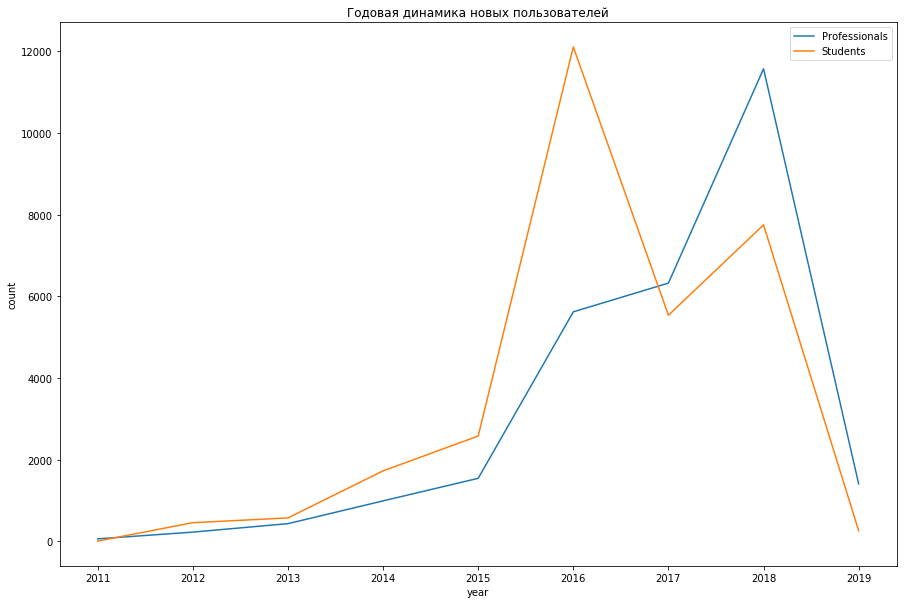

In [0]:
professionals_yearly_count = yearly_growth(professionals, 'professionals_date_joined')
students_yearly_count = yearly_growth(students, 'students_date_joined')

plt.figure(figsize=(15, 10))
plt.plot(professionals_yearly_count, label='Professionals')
plt.plot(students_yearly_count, label='Students')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Годовая динамика новых пользователей')
plt.legend()
plt.show()

Наблюдается положительная динамика в росте количества профессионалов, посмотрим подробнее.

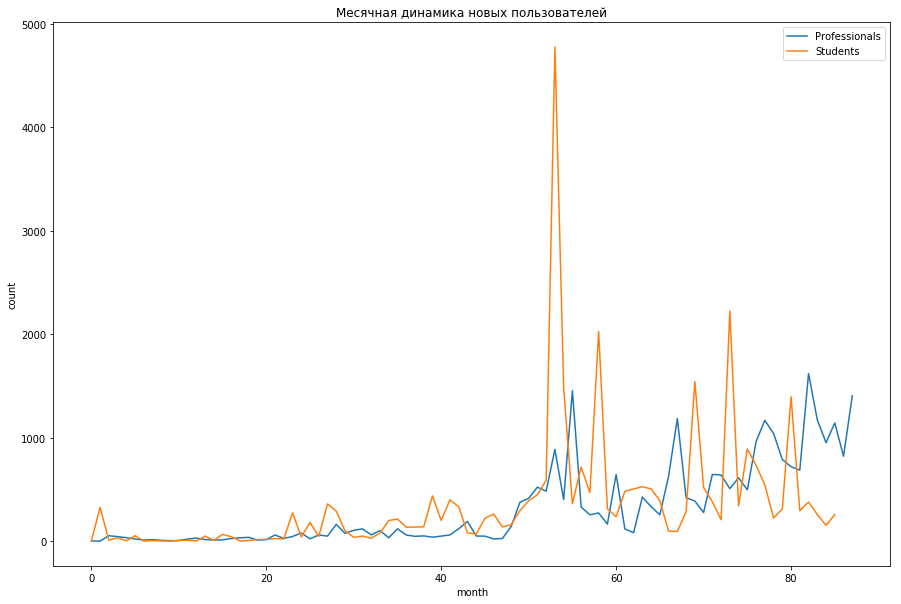

In [0]:
professionals_monthly_count = monthly_growth(professionals, 'professionals_date_joined')
students_monthly_count = monthly_growth(students, 'students_date_joined')

plt.figure(figsize=(15, 10))
plt.plot(professionals_monthly_count.professionals_id, label='Professionals')
plt.plot(students_monthly_count.students_id, label='Students')
plt.xlabel('month')
plt.ylabel('count')
plt.title('Месячная динамика новых пользователей')
plt.legend()
plt.show()

С каждым месяцев прибывает все больше профессионалов, у студентов так же положительная динамика и прирост происходит более резкими скачками.

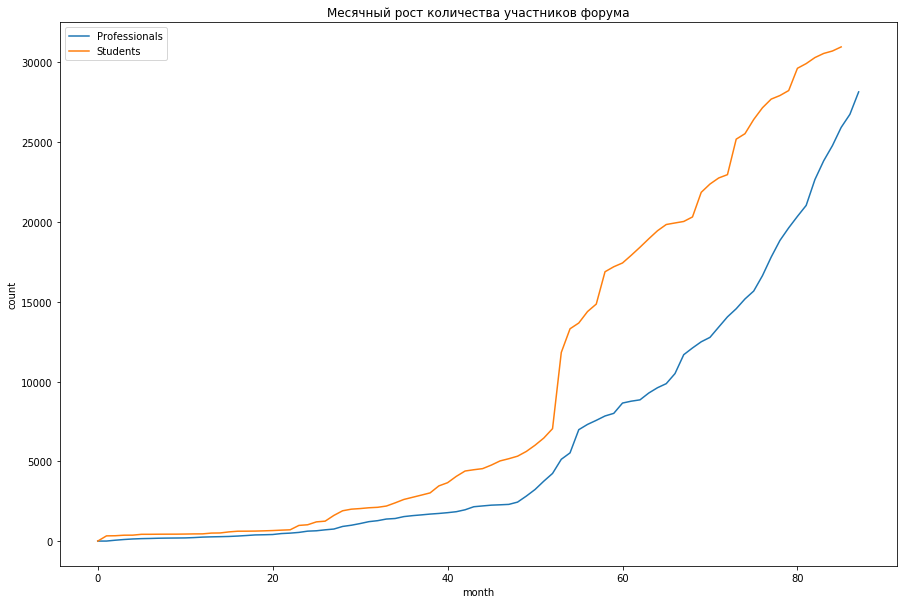

In [0]:
professionals_monthly_cumcount = monthly_count(professionals, 'professionals_date_joined')
students_monthly_cumcount = monthly_count(students, 'students_date_joined')

plt.figure(figsize=(15, 10))
plt.plot(professionals_monthly_cumcount.professionals_id, label='Professionals')
plt.plot(students_monthly_cumcount.students_id, label='Students')
plt.xlabel('month')
plt.ylabel('count')
plt.title('Месячный рост количества участников форума')
plt.legend()
plt.show()

Предыдущий вывод хорошо демонстрирует график с ростом количества участников форума.

Теперь наконец мы можем ответить на вопрос: какая часть участников форума пользуется системой отслеживания тэгов.

In [0]:
t_users.groupby(t_users.tag_users_user_id).count().shape[0]

30202

In [0]:
print(round(30202*100/(professionals.shape[0]+students.shape[0]),1),
      '% пользователей пользуется отслеживанием тэгов.')

51.1 % пользователей пользуется отслеживанием тэгов.


13) Рассмотрим $\textbf{comments:}$

In [0]:
main_stats(comments)

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40,"First, you speak to recruiters. They are train..."
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47,Most large universities offer study abroad pro...
2,c354f6e33956499aa8b03798a60e9386,6ed20605002a42b0b8e3d6ac97c50c7f,ca7a9d7a95df471c816db82ee758f57d,2019-01-31 18:44:04,"First, I want to put you at ease that the oppo..."
3,73a6223948714c5da6231937157e4cb7,d02f6d9faac24997a7003a59e5f34bd3,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 17:53:28,Your question submission was great! I just wan...
4,55a89a9061d44dd19569c45f90a22779,e78f75c543e84e1c94da1801d8560f65,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 14:51:53,Thank you. I'm new to this site. I'm sorry if ...


число наблюдений = 14962

число уникальных значений признаков


comments_id                   14962
comments_author_id             4230
comments_parent_content_id     9923
comments_date_added           14901
comments_body                 11963
dtype: int64

4230 уникальных комментаторов оставили 14962 комментариев. В среднем, каждый комментатор оставляет 3.5 комментария.

Так же мы знаем количество зарегестрированных людей на ресурсе, посчитаем какой процент людей оставляет комментарии.

In [0]:
print(round(4230*100/(professionals.shape[0]+students.shape[0]),1),
      '% пользователей оставляли хотя бы 1 комментарий.')

7.2 % пользователей оставляли хотя бы 1 комментарий.


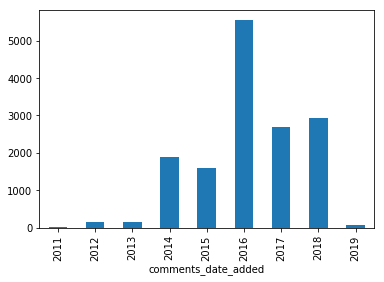

In [0]:
comments['comments_date_added'] = pd.to_datetime(comments['comments_date_added'])
comments.groupby(comments.comments_date_added.dt.year).comments_id.count().plot.bar()
plt.show()

Помимо известного всплеска активности в 2016 году, мы так же видим всплеск активности комментариев в 2014.

In [0]:
comments['comments_body'].str.lstrip('<p> \n\t').str.len().mean()

165.35362919395803

Средний комментарий короче вопроса и ответа (165 против 890 и 223 соответственно).

In [0]:
comments.groupby(comments.comments_parent_content_id).comments_id.count().mean()

1.5078101380630857

Среднее значение комментариев под каждым ответов - 1.5

14) Рассмотрим $\textbf{emails:}$

In [0]:
main_stats(emails)

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27,email_notification_daily
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19,email_notification_daily
4,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40,email_notification_daily


число наблюдений = 1850101

число уникальных значений признаков


emails_id                 1850101
emails_recipient_id         22168
emails_date_sent          1610163
emails_frequency_level          3
dtype: int64

In [0]:
print('Среднее количество полученных писем каждым пользователем = {:2.2f}'.format(1850101/22168))

Среднее количество полученных писем каждым пользователем = 83.46


In [0]:
print('Существуют 3 вида email уведомлений:')
for i in range(len(emails['emails_frequency_level'].unique())): 
    print (emails['emails_frequency_level'].unique()[i])

Существуют 3 вида email уведомлений:
email_notification_daily
email_notification_immediate
email_notification_weekly


In [0]:
emails.groupby(emails.emails_frequency_level).emails_id.count()

emails_frequency_level
email_notification_daily        1488240
email_notification_immediate     333183
email_notification_weekly         28678
Name: emails_id, dtype: int64

Ежедневные почтовые уведомления наиболее популярны. Недельные наименее распостранены.

In [0]:
emails.loc[emails.emails_frequency_level=='email_notification_daily'].sort_values(by=['emails_date_sent']).head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
81448,2340,64a77f3d3be84ba5a71ba6081e086c3a,2014-02-03 23:00:04,email_notification_daily
84312,2341,d49b70f663074d3494252f0d834bac6b,2014-02-03 23:00:04,email_notification_daily
41133,2898,9ce1a6a0bb3c4cc49bc6414788b80c49,2014-02-11 23:00:04,email_notification_daily
96572,2899,eea91690141e4abb98d66ab65852acce,2014-02-11 23:00:05,email_notification_daily
105443,3316,7288ca4b38eb424dbffc39b21e72aebf,2014-02-14 23:00:04,email_notification_daily


Первые ежедневные почтовые уведомления были отправлены в 2014 году.

In [0]:
emails.loc[emails.emails_frequency_level=='email_notification_immediate'].sort_values(by=['emails_date_sent']).head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
16398,106,407c325e0cfe4dc7b993edb525e07849,2013-11-23 00:17:42,email_notification_immediate
48794,108,2b561cc648da4d08a082a3a835e73766,2013-11-23 00:17:43,email_notification_immediate
21934,107,368b46536e8d40079f20f314f0ad2655,2013-11-23 00:17:43,email_notification_immediate
48886,110,dbf810042a6744058d518dda7643b02b,2013-11-23 00:17:44,email_notification_immediate
10348,279,44b2484ecd3642c6a47514f3876cf14a,2013-12-03 22:45:51,email_notification_immediate


В конце 2013 были отправленны первые мгновенные уведомления.

Посмотрим на пользователей с наибольшим количеством полученных email уведомлений.

In [0]:
emails.groupby(emails.emails_recipient_id).emails_id.count().sort_values()

emails_recipient_id
a33a1617ecb14884b3ee0c99ad372e0f       1
e22cad3d29384df0b2c0fa9f99e153da       1
2a9358b45a1043b5b01e23e85f418376       1
2a8b6b2b4aaa44d297f99d40062ac997       1
bf24c04c3f63473c92e7ffe6ba6448ed       1
77aff8c0735242ea9574f33726849b58       1
bf24ecd287ba4fd6a8db1bea0bac653c       1
7765bdee8b5b4d52b1866fa19bbb1b45       1
77ba6d8b69874361b31f22b84548b118       1
bf351324cfb34cbf890d260a39ab4809       1
e1dadbdaee7b4f3b9233d6887946d675       1
8ffae02d90fc44b583dc0a51956c66e1       1
                                    ... 
bb73af76350b4d7ca923129d2bc734c9    1717
1d8d4ea9cd03402cb4b34aa41ad9f3a0    1861
99c1e11f1161446f9199feab65b4b795    1942
73cbd4b0241f4e9dbd5e8b5b48c7e701    1958
547122349484428c885dd9d18051b71e    2016
5688bc6b68b243a7bb3144f0fcc02a30    2133
ccad06e8fb2749c8bccee97b2538ea50    2252
a41eeb74c7ad4310be0a166d3dac3d12    2587
82d744719ffd452a8b1bd62cd17e5056    2637
a082cb6441ce48f6bf9abe0f8e55d5fe    2970
36ff3b3666df400f956f8335cf53e09e    3

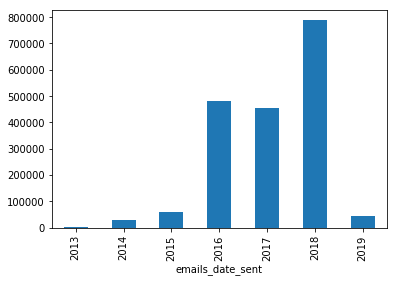

In [0]:
emails.groupby(emails.emails_date_sent.dt.year).emails_id.count().plot.bar()
plt.show()

Наблюдается позитивная тенденция в количестве отправляемых пользователям email сообщений. Скорее всего это связано с количественным ростом аудитории ресурса.

15) Рассмотрим $\textbf{matches:}$

In [0]:
main_stats(matches)

,matches_email_id,matches_question_id
0,1721939,332a511f1569444485cf7a7a556a5e54
1,1665388,332a511f1569444485cf7a7a556a5e54
2,1636634,332a511f1569444485cf7a7a556a5e54
3,1635498,332a511f1569444485cf7a7a556a5e54
4,1620298,332a511f1569444485cf7a7a556a5e54


число наблюдений = 4316275

число уникальных значений признаков


matches_email_id       1794085
matches_question_id      21894
dtype: int64

Похоже что matches_email_id это уже не уникальные email_id.

In [0]:
matches.groupby(matches.matches_question_id).matches_email_id.count().sort_values()

matches_question_id
feb08f17ab834693ba4df126699d67f8       1
d14bfb91bf194f718eb40e1afd98f858       1
655df5914ba347ff88ef6722993e0ebf       1
3c9dcef198dc4150962779e5ef80eab3       1
8c9df8b08466440390343fd40e70ad28       1
d5e8772db14d4884b1d2ae66b7358cb6       1
d5ea227ac39d450791692e29b0090925       1
5b796797d5274fbb81bc0cf56b5b7c2d       1
135d4ec7a2794370ba3177c119a54308       1
0b8cf32fd00048e4a31a86b76403b20b       1
1dd0c363a3834dab9d62693ec708e903       1
c227b3e687df475fb43f717c0649bcdf       1
                                    ... 
395aa1b1f2c94f82b43746e062ccd3e9    1614
52650cfd697c40be8b6f0b763ba05fd2    1632
c146e9855bbf45b68b8b976326714c89    1638
b6f1419f0ac24d93bb83bf722bea6447    1647
894d1e27a7aa42359b3dfbecc82eda1e    1649
e01d3b0b12a741ad9c621f3ac831d3a2    1659
4f3db830d5ed4e178534a87bb14925e8    1698
0b1be66cd79e456ba75b5eec186b65a9    1756
25af07c8de984543b3d735891d7f3fd3    1765
502af307aca94f0fbd5318a46dda0c89    1781
5a66b47f099f4e2ab069f42c7a4b076c    1

Вопрос с самым большим количеством уведомлений - 2099 штук.

In [0]:
q_scores.loc[q_scores.id=='d9b06cd477a943b9b3821f37d64a1da3']

,id,score
15105,d9b06cd477a943b9b3821f37d64a1da3,2


In [0]:
q_scores.loc[q_scores.id=='5a66b47f099f4e2ab069f42c7a4b076c']

,id,score
14751,5a66b47f099f4e2ab069f42c7a4b076c,3


Вопросы с максимальными количеством уведомлений имеют мало оценок. Выглядит аномально.

In [0]:
matches.groupby(matches.matches_email_id).matches_question_id.count().sort_values()

matches_email_id
106          1
1047447      1
2206348      1
2206344      1
1047454      1
1047456      1
2206342      1
1047459      1
1047445      1
1047460      1
1047463      1
1047465      1
          ... 
569826     190
508674     194
569949     204
508625     204
508558     213
569942     229
569950     242
508675     247
569941     253
569829     258
569892     266
569938     268
Name: matches_question_id, Length: 1794085, dtype: int64

In [0]:
emails.loc[emails.emails_id == 569938]

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
932586,569938,d0627db80d7045149a5345e1487bf33c,2016-05-27 21:01:27,email_notification_weekly


Скорее всего, matches_email_id имеющие много matches_question_id - это еженедельные уведомления для одного пользователя, в которых содержится много вопросов, накопившихся за неделю.

16) Рассмотрим $\textbf{groups:}$

In [0]:
main_stats(groups)

,groups_id,groups_group_type
0,eabbdf4029734c848a9da20779637d03,youth program
1,7080bf8dcf78463bb03e6863887fd715,youth program
2,bc6fc50a2b444efc8ec47111b290ffb8,youth program
3,37f002e8d5e442ca8e36e972eaa55882,youth program
4,52419ff84d4b47bebd0b0a6c1263c296,youth program


число наблюдений = 49

число уникальных значений признаков


groups_id            49
groups_group_type     7
dtype: int64

In [0]:
print('Существуют 7 видов групп:')
for i in range(len(groups['groups_group_type'].unique())): 
    print (groups['groups_group_type'].unique()[i])

Существуют 7 видов групп:
youth program
cause
professional network
club
competition
mentorship program
interest group


Посмотрим на количество групп каждого вида:

In [0]:
groups.groupby(groups.groups_group_type).groups_id.count().sort_values()

groups_group_type
club                     1
competition              1
interest group           1
cause                    2
mentorship program       3
professional network     8
youth program           33
Name: groups_id, dtype: int64

youth program определенно самый популярный тип групп.

17) Рассмотрим $\textbf{g_memb:}$

In [0]:
main_stats(g_memb)

,group_memberships_group_id,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d
3,eabbdf4029734c848a9da20779637d03,fa9a126e63714641ae0145557a390cab
4,eabbdf4029734c848a9da20779637d03,299da113c5d1420ab525106c242c9429


число наблюдений = 1038

число уникальных значений признаков


group_memberships_group_id     46
group_memberships_user_id     727
dtype: int64

В 46 из 49 групп есть люди. В среднем 1 человек находится только в 1 группе.

In [0]:
g_memb.groupby(g_memb.group_memberships_group_id).group_memberships_user_id.count().sort_values()

group_memberships_group_id
64f55a07c0864292afe4b41d674ee2e9      1
6f13430a2bd1409f8c0863ca3a133db6      1
d617d88792bf4fa5bff144d0ddb3bdf0      2
7080bf8dcf78463bb03e6863887fd715      3
7d715f982c8b4a6da7be5142f74b1472      3
e2d6994350424f46a329cb3ba17e4893      3
559dbc7bd1f64c268ff149c4d5d63500      3
c8ec0ba0966b4eba8f50e1a279742e8e      3
febfa8fcd364484487a245d32dbe24f7      4
414e3cd11cd84e549abe723567e8d931      4
55e6f99b63e24b2ea21b99d31064717b      5
eabbdf4029734c848a9da20779637d03      5
                                   ... 
f79273f51df849d298bd6f4b86daee99     28
cfdab61b2c6c47a78c4641852debb38f     28
cfaac1762bed4c8bb88696267129a560     34
37f002e8d5e442ca8e36e972eaa55882     34
52419ff84d4b47bebd0b0a6c1263c296     39
d692245208e248e49625d76f6b932aff     44
528fa2c7559a40749b6151a07d3b8ef5     48
df78fe697f3b41068d2efc3654f5e707     58
e6780d7982c14f9aba3fdf8bee66a2ad     60
ba94226c87d249a1a2dbdc32a848b769     77
45b7c8a5647647df92de6f40d5f12682    115
f16d593910bf4

In [0]:
groups.loc[groups.groups_id == 'f16d593910bf443598839021bbe97128']

,groups_id,groups_group_type
19,f16d593910bf443598839021bbe97128,cause


In [0]:
groups.loc[groups.groups_id == '45b7c8a5647647df92de6f40d5f12682']

,groups_id,groups_group_type
18,45b7c8a5647647df92de6f40d5f12682,cause


Хоть youth program и самый распостранненый вид групп, к типу cause принадлежат 2 самые многочисленные группы.

18) Рассмотрим $\textbf{sch_memb:}$

In [0]:
sch_memb.head()

,school_memberships_school_id,school_memberships_user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d
2,199821,23dce13ca6164a73aec7a3cd56a4884d
3,186239,9c5803ae43ca4cf6b27ea85871625116
4,182063,9c5803ae43ca4cf6b27ea85871625116


In [0]:
sch_memb.shape

(5638, 2)

In [0]:
sch_memb.nunique()

school_memberships_school_id    2706
school_memberships_user_id      3181
dtype: int64

Посмотрим в каких школах больше всего учащихся:

In [0]:
sch_memb.groupby(sch_memb.school_memberships_user_id).school_memberships_school_id	.count().sort_values()

school_memberships_user_id
85d47bec01274592b41e16297af2880d     1
99277a5dc1884d4fa38a5c9ca3100287     1
991ab0a7d05446879138784dc3cb7408     1
98cbceefad3e4f7db812f5d2a963db3f     1
98c6c424727f4abf9d570ecf9d2fd24f     1
98931001dfa1461cacb34cc30dd58c23     1
98905cc3ac5f4490b0f90018257fc402     1
988a1a169209402e851814edbc9ea594     1
986a6efc73f840a9947e81f6b7aaf38a     1
985edda7364a4e42819a4d471b6f3321     1
9841215fcfdd4aa095d97ebbd6e9efaa     1
983d090aee56437b934c4a38c006dcc5     1
                                    ..
ca8cf29aedf74c94b131a9ac75f52895     9
65e1b233c443411689b837b35602a02b    10
b1c77f0004d5498cab08ed211528a7eb    10
36ff3b3666df400f956f8335cf53e09e    10
fa2390b702804bbb957d2236c8b07d38    11
a9816607755f42ae999c1cd0d29d4867    12
6d1b569a8a024dc88b35f5cdb1570dc1    15
b04b09de94044000b2616389eb1419c3    15
30f79e36479a4f29be36c71a7edc34a6    16
338635b17df248b3959ab4d5423cc6f3    17
a1246930dc4944ae840cd7c25a34c9a7    20
a7730a0f42cb4cd6805cecc03ec2df0a    2

В целом, ни одна школа не выделяется численностью участников.

19) Визуализация соотношения $\textbf{студентов/профессионалов}$ и  $\textbf{вопросов/ответов}$

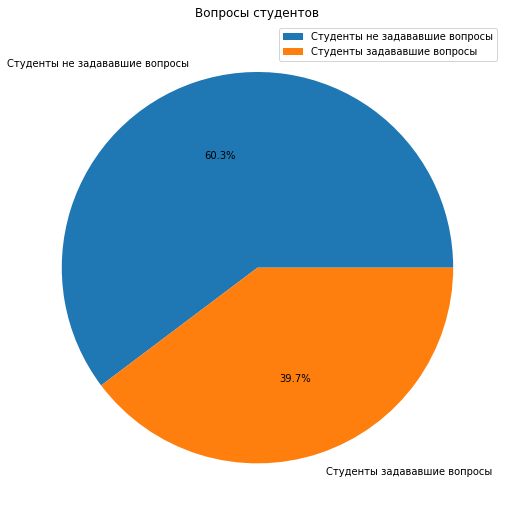

In [0]:
plot_pie(students,questions,'Вопросы студентов',
         'Студенты не задававшие вопросы',
         'Студенты задававшие вопросы')

Более 60% студентов ни разу не задавали вопросы.

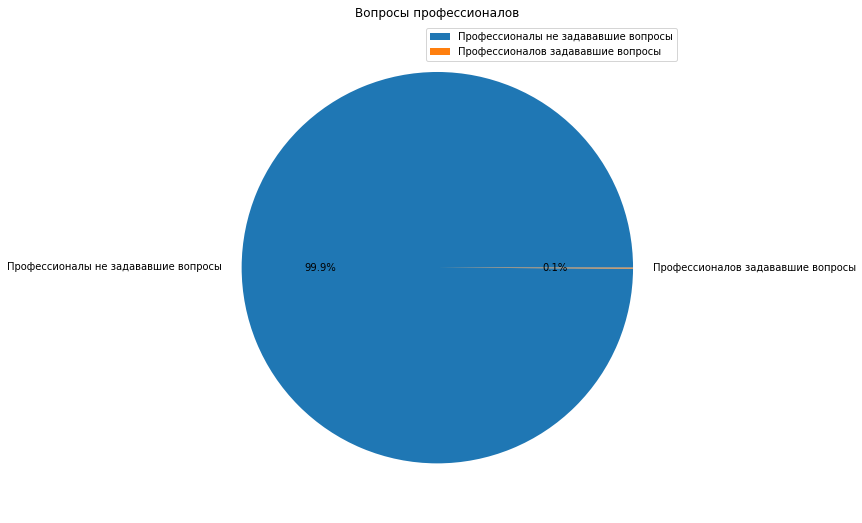

In [0]:
plot_pie(professionals, questions, 'Вопросы профессионалов',
         'Профессионалы не задававшие вопросы',
         'Профессионалов задававшие вопросы')

Профессионалы обычно не задают вопросы :)

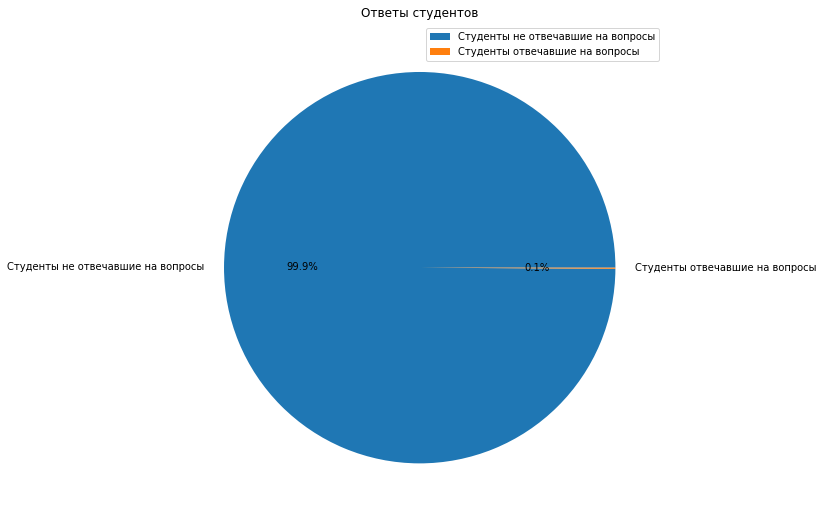

In [0]:
plot_pie(students, answers, 'Ответы студентов',
         'Студенты не отвечавшие на вопросы',
         'Студенты отвечавшие на вопросы')

А студенты обычно не отвечают на вопросы

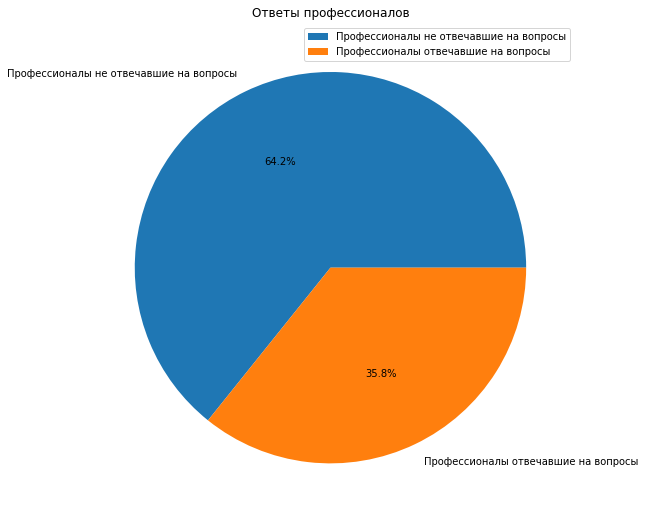

In [0]:
plot_pie(professionals, answers, 'Ответы профессионалов',
         'Профессионалы не отвечавшие на вопросы',
         'Профессионалы отвечавшие на вопросы')

Примерно 36% профессионалов когда-либо отвечали на вопросы.

In [0]:
#Т.к. я не передаю в функцию поле с id, оформил эту функцию отдельно.
#Круговая диаграмма
def plot_pie(df1, df2, pie_title, pie_label_1, pie_label_2):
    id_df1_name = [col for col in df1.columns if 'questions_id' in col][0]
    id_df2_name = [col for col in df2.columns if 'answers_question_id' in col][0]
    df_merge = pd.merge(df1, df2, how='left', left_on = id_df1_name, right_on = id_df2_name)
    df = pd.DataFrame({'': [df_merge.isna().sum()[id_df2_name],
                                    df1.shape[0] - df_merge.isna().sum()[id_df2_name]]},
                   index=['1', '2'])
    ax = df.plot.pie(y='', figsize=(9, 9),labels=[
            pie_label_1,
            pie_label_2],
            autopct='%1.6f%%')
    ax.set_title(pie_title)
    plt.show()

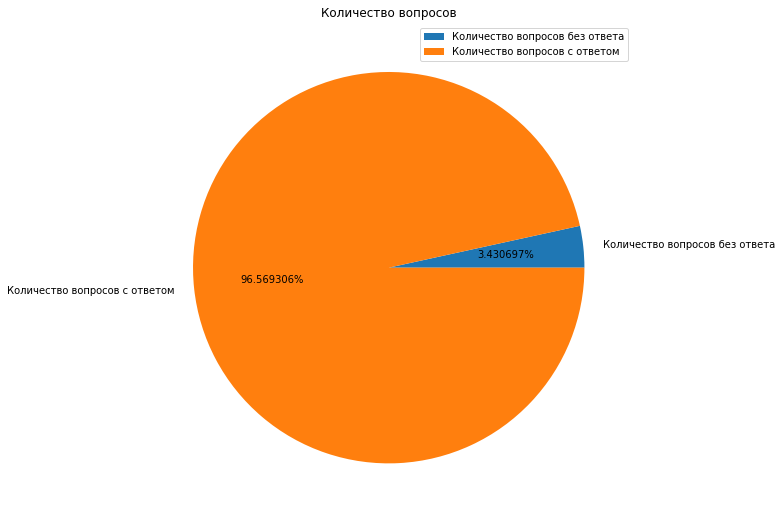

In [0]:
plot_pie(questions, answers, 'Количество вопросов', 'Количество вопросов без ответа', 'Количество вопросов с ответом')

Большинство вопросов не остались без ответа!